In [ ]:
!pip install yfinance pandas matplotlib scikit-learn

In [2]:
# 2. 데이터 불러오기 및 정제
# Yahoo Finance API를 사용해 삼성전자 주가 데이터를 다운로드하고 필요한 부분만 정제합니다.
import yfinance as yf  # 금융 데이터 다운로드 및 Yahoo Finance API 사용
import pandas as pd  # 데이터 조작 및 분석을 위한 DataFrame 처리
import numpy as np  # 수학적 연산과 배열 조작을 위한 라이브러리
from sklearn.preprocessing import MinMaxScaler  # 데이터 정규화를 위한 스케일링 도구
import torch  # PyTorch를 사용한 신경망 구현 및 연산
from torch.utils.data import DataLoader, TensorDataset  # PyTorch 데이터 로딩 및 텐서 처리
import torch.nn as nn  # PyTorch의 신경망 모듈 정의 및 레이어 구성
import matplotlib.pyplot as plt  # 데이터 시각화와 플롯 생성 도구

In [ ]:
# 코랩에서, 최근 데이터의 주가 받기.
# 그리고, 전처리 후 사용하기!!!!!!!
# 1. 필요한 라이브러리 임포트
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import os # 파일 경로 관리를 위해 os 라이브러리 추가

# =================================================================
# 1단계: yfinance로 주식 데이터 다운로드 후 CSV 파일로 저장
# =================================================================

# 다운로드할 주식 티커와 기간 설정
ticker = "005930.KS"  # 삼성전자 (한국 거래소 코드)
start_date = "2022-01-01"
end_date = "2025-10-13"

print(f"'{ticker}' 주식 데이터를 다운로드합니다...")
# yfinance를 사용하여 데이터 다운로드
# data 변수에는 Open, High, Low, Close, Adj Close, Volume 컬럼이 포함된 DataFrame이 저장됩니다.
data = yf.download(ticker, start=start_date, end=end_date)

# CSV 파일로 저장할 경로와 파일명 설정
# Google Colab 환경을 가정했으며, 로컬 환경일 경우 경로를 수정해주세요. (예: "C:/my_folder/samsung_stock.csv")
csv_path = "/content/drive/MyDrive/busanit-251001/3-RNN-LSTM-GRU/"
csv_filename = "7-samsung_stock_2022_01_2025_10_13.csv"
full_path = os.path.join(csv_path, csv_filename)

# 저장할 디렉토리가 없다면 생성
os.makedirs(csv_path, exist_ok=True)

# DataFrame을 CSV 파일로 저장 (to_csv 사용)
# index=True로 설정하여 날짜 인덱스도 함께 저장합니다.
data.to_csv(full_path)

print(f"데이터를 성공적으로 '{full_path}' 파일로 저장했습니다.")
print("-" * 50)

In [13]:
# ticker = "005930.KS"  # 삼성전자 주식의 한국 거래소 코드 설정
# data = yf.download(ticker, start="2018-01-01", end="2024-11-05")  # 주식 데이터를 다운로드, end 기간에 원하는 기간으로 변경해서 사용 가능
# 1. 티커 설정 및 다운로드
# ticker = "005930.KS"  # 삼성전자 (한국 거래소 코드)
# data = yf.download(ticker, start="2018-01-01", end="2024-11-05")

# 2. CSV 파일로 저장
csv_filename = "/content/drive/MyDrive/busanit501-1234/samsung_stock_2018_2024.csv"
# data.to_csv(csv_filename)
# CSV 불러올 때 컬럼명을 직접 설정
# 데이터 불러오기 (첫 번째 열을 날짜 인덱스로 설정)
data = pd.read_csv(csv_filename, index_col=0, parse_dates=True)

# 컬럼명 공백 제거 (혹시 있을 경우 대비)
data.columns = data.columns.str.strip()

# 컬럼명 확인 (디버깅용)
print("Columns in CSV:", data.columns)

# 필요한 컬럼 선택
data = data[['Open', 'High', 'Low', 'Close']]

# 데이터 확인
print(data.head())
# 받아오는 전체 데이터 값 종류: Open(시가), High(고가), Low(저가), Close(종가), Adj Close(조정 종가), Volume(거래량)
data = data[['Open', 'High', 'Low', 'Close']]  # 특정 열만 추출(시가, 고가, 저가, 종가), data 모양 예시: [행 개수, 4] (예: [1500, 4])

scaler = MinMaxScaler()  # 데이터 정규화를 위한 스케일러
data_scaled = scaler.fit_transform(data)  # 데이터 정규화 수행, data_scaled 모양 예시: [행 개수, 4] (예: [1500, 4])

X = []  # 입력 데이터 배열 초기화
y = []  # 타겟 데이터 배열 초기화
window_size = 60  # 과거 60일 데이터를 기반으로 예측할 윈도우 크기

for i in range(window_size, len(data_scaled)):
  X.append(data_scaled[i-window_size:i, :])  # 윈도우 크기만큼의 시계열 데이터 추가 (시가, 고가, 저가, 종가), X의 각 항목 모양 예시: [60, 4]
  y.append(data_scaled[i, 3])  # 종가(Close) 예측을 위한 타겟 데이터 추가, y의 각 항목은 단일 값 (예: 0.85)

X = np.array(X)  # 입력 데이터 배열 변환, X 모양 예시: [전체 데이터 수 - window_size, 60, 4]
y = np.array(y)  # 타겟 데이터 배열 변환, y 모양 예시: [전체 데이터 수 - window_size]


Columns in CSV: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
                   Open         High          Low        Close
2018-01-02  42479.54416  42496.07960  41983.48098  42181.90625
2018-01-03  43438.59498  43455.13042  42512.61047  42677.96484
2018-01-04  43091.35057  43140.95688  41867.72818  42231.50781
2018-01-05  42413.41014  43091.36328  42330.73292  43091.36328
2018-01-08  43322.85305  43422.06569  42578.75825  43008.67969


In [ ]:
# 3. RNN 모델 정의

# RNN을 사용하여 삼성전자 주가를 예측하는 모델을 정의합니다.

# PyTorch의 신경망 모듈을 상속받아 주식 예측을 위한 RNN 모델을 정의하는 클래스
class StockRNN(nn.Module):
    # 모델의 초기화 함수로 입력, 은닉, 출력 크기를 정의
    def __init__(self, input_size, hidden_size, output_size):
        super(StockRNN, self).__init__()  # 부모 클래스의 초기화 메서드 호출
	 # 시계열 데이터를 처리하기 위한 RNN 레이어
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)

	 # 은닉 상태를 최종 예측 값으로 변환하는 선형 레이어
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):  # 모델의 순전파 정의
        out, _ = self.rnn(x)  # 입력 시퀀스를 RNN으로 처리하여 출력과 은닉 상태 반환
	# 마지막 시점의 출력을 선형 레이어로 변환하여 예측값 반환
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# 4. 학습 데이터 준비 및 훈련

import os  # 운영 체제와 상호 작용하기 위한 모듈
# Google Colab에서 Google Drive를 마운트하기 위한 모듈
from google.colab import drive
drive.mount('/content/drive')  # Google Drive를 '/content/drive' 경로에 마운트

train_size = int(0.8 * len(X))  # 데이터셋의 80%를 훈련용으로 설정
X_train, X_test = X[:train_size], X[train_size:]  # 입력 데이터 훈련 및 테스트 분할, X_train 모양 예시: [배치 크기, 60, 4], X_test 모양 예시: [배치 크기, 60, 4]
y_train, y_test = y[:train_size], y[train_size:]  # 타겟 데이터 훈련 및 테스트 분할, y_train 모양 예시: [배치 크기], y_test 모양 예시: [배치 크기]

train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.float32))  # 훈련 데이터를 PyTorch 텐서 데이터셋으로 변환
test_data = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.float32))  # 테스트 데이터를 PyTorch 텐서 데이터셋으로 변환
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)  # 훈련 데이터를 배치 단위로 로딩하기 위한 DataLoader 생성
test_loader = DataLoader(test_data, batch_size=32)  # 테스트 데이터를 배치 단위로 로딩하기 위한 DataLoader 생성
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")  # GPU 가용 여부에 따라 학습 장치 설정
model = StockRNN(input_size=4, hidden_size=64, output_size=1).to(device)
criterion = nn.MSELoss()  # 손실 함수로 평균 제곱 오차 사용
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam 최적화 알고리즘으로 모델의 파라미터를 최적화

# 모델 학습

epochs = 50  # 학습을 위한 에포크 수 설정
train_losses = []  # 훈련 손실을 저장할 리스트
test_losses = []  # 테스트 손실을 저장할 리스트

for epoch in range(epochs):  # 지정된 에포크 수만큼 반복
   model.train()  # 모델을 학습 모드로 설정
   train_loss = 0  # 훈련 손실 초기화
   for X_batch, y_batch in train_loader:  # 훈련 데이터 배치 처리
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 입력 데이터를 장치에 할당 (CPU/GPU), X_batch 모양 예시: [32, 60, 4], y_batch 모양 예시: [32]
      optimizer.zero_grad()  # 이전 그래디언트 초기화
      predictions = model(X_batch)  # 모델의 예측값 계산, predictions 모양 예시: [32, 1]
      loss = criterion(predictions.squeeze(), y_batch)  # 손실 계산, loss는 스칼라 값 예시 (예: 0.045)
      loss.backward()  # 그래디언트 역전파
      optimizer.step()  # 모델의 파라미터 업데이트
      train_loss += loss.item()  # 배치 손실을 누적

   train_loss /= len(train_loader)  # 훈련 손실 평균 계산
   train_losses.append(train_loss)  # 훈련 손실을 리스트에 추가

   model.eval()  # 모델을 평가 모드로 설정
   test_loss = 0  # 테스트 손실 초기화
   with torch.no_grad():  # 그래디언트 비활성화
      for X_batch, y_batch in test_loader:  # 테스트 데이터 배치 처리
          X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 입력 데이터를 장치에 할당, X_batch 모양 예시: [32, 60, 4], y_batch 모양 예시: [32]
          predictions = model(X_batch)  # 모델의 예측값 계산, predictions 모양 예시: [32, 1]
          loss = criterion(predictions.squeeze(), y_batch)  # 손실 계산, loss는 스칼라 값 예시 (예: 0.032)
          test_loss += loss.item()  # 배치 손실을 누적

   test_loss /= len(test_loader)  # 테스트 손실 평균 계산
   test_losses.append(test_loss)  # 테스트 손실을 리스트에 추가

   print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")  # 에포크 진행 상황 출력

# 저장 위치
model_weight_save_path = "/content/drive/MyDrive/bookWriter/rnn/samsungStock/"
# 모델 저장
torch.save(model.state_dict(), os.path.join(model_weight_save_path, 'samsungStock.pth'))  # 모델 가중치 저장
torch.save(scaler, os.path.join(model_weight_save_path, 'scaler.pth'))  # 데이터 스케일러 저장


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50, Train Loss: 0.0337, Test Loss: 0.0045
Epoch 2/50, Train Loss: 0.0010, Test Loss: 0.0011
Epoch 3/50, Train Loss: 0.0007, Test Loss: 0.0010
Epoch 4/50, Train Loss: 0.0006, Test Loss: 0.0012
Epoch 5/50, Train Loss: 0.0006, Test Loss: 0.0012
Epoch 6/50, Train Loss: 0.0007, Test Loss: 0.0009
Epoch 7/50, Train Loss: 0.0006, Test Loss: 0.0009
Epoch 8/50, Train Loss: 0.0005, Test Loss: 0.0010
Epoch 9/50, Train Loss: 0.0006, Test Loss: 0.0009
Epoch 10/50, Train Loss: 0.0005, Test Loss: 0.0009
Epoch 11/50, Train Loss: 0.0005, Test Loss: 0.0009
Epoch 12/50, Train Loss: 0.0005, Test Loss: 0.0008
Epoch 13/50, Train Loss: 0.0005, Test Loss: 0.0008
Epoch 14/50, Train Loss: 0.0005, Test Loss: 0.0008
Epoch 15/50, Train Loss: 0.0005, Test Loss: 0.0008
Epoch 16/50, Train Loss: 0.0005, Test Loss: 0.0008
Epoch 17/50, Train Loss: 0.0005, Test Loss: 0.0007
Epoch 18/50, 

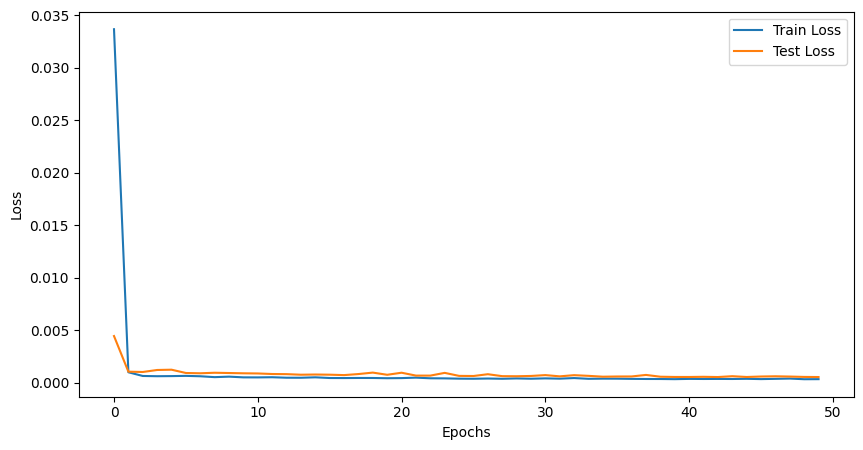

In [ ]:
# 5. 손실 값 그래프 시각화

plt.figure(figsize=(10, 5))  # 그래프 크기를 10x5로 설정
plt.plot(train_losses, label="Train Loss")  # 훈련 손실을 그래프로 그리기
plt.plot(test_losses, label="Test Loss")  # 테스트 손실을 그래프로 그리기
plt.xlabel("Epochs")  # x축 레이블 설정
plt.ylabel("Loss")  # y축 레이블 설정
plt.legend()  # 그래프에 범례 추가
plt.show()  # 그래프를 화면에 표시

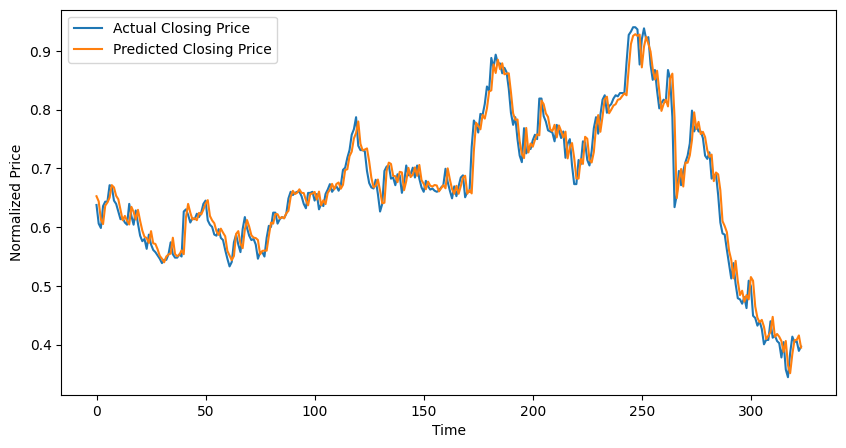

In [ ]:
# 6. 예측값 생성 및 시각화

# 훈련된 모델을 이용해 테스트 데이터에 대한 예측을 수행하고, 예측 결과를 시각화합니다.

# 테스트 데이터에 대한 예측
model.eval()  # 모델을 평가 모드로 전환하여 드롭아웃 및 배치 정규화를 비활성화합니다.
predictions = []  # 예측된 값을 저장할 리스트를 초기화합니다.
actual = []  # 실제 값을 저장할 리스트를 초기화합니다.
with torch.no_grad():  # 기울기 계산을 비활성화하여 메모리 사용량을 줄입니다.
  for X_batch, y_batch in test_loader:  # 테스트 데이터를 배치 단위로 반복합니다.
      X_batch, y_batch = X_batch.to(device), y_batch.to(device)  # 데이터를 지정한 장치로 이동시킵니다.
      pred = model(X_batch).squeeze()  # 모델을 통해 예측값을 얻고 불필요한 차원을 제거합니다.
      predictions.extend(pred.cpu().numpy())  # 예측값을 CPU로 이동 후 리스트에 추가합니다.
      actual.extend(y_batch.cpu().numpy())  # 실제 값을 CPU로 이동 후 리스트에 추가합니다.
plt.figure(figsize=(10, 5))  # 시각화할 그래프 크기를 설정합니다.
plt.plot(actual, label="Actual Closing Price")  # 실제 값의 변화를 선 그래프로 그립니다.
plt.plot(predictions, label="Predicted Closing Price")  # 예측 값의 변화를 선 그래프로 그립니다.
plt.xlabel("Time")  # x축 라벨을 설정합니다.
plt.ylabel("Normalized Price")  # y축 라벨을 설정합니다.
plt.legend()  # 그래프의 범례를 표시합니다.
plt.show()  # 그래프를 화면에 표시합니다.

In [ ]:
# 7. 샘플 입력값으로 다음날 예측값 구하기

# 마지막 60일의 데이터를 입력값으로 사용하여 다음날 주가 예측
# 임의의 입력값을 통해 다음날 주가를 예측합니다.
# window_size = 60
last_60_days = data_scaled[-window_size:]  # 데이터의 마지막 60일을 선택하여 입력값으로 사용합니다.
last_60_days = np.expand_dims(last_60_days, axis=0)  # 모델 입력에 적합하도록 차원을 추가합니다.
last_60_days_tensor = torch.tensor(last_60_days, dtype=torch.float32).to(device)  # 데이터를 텐서로 변환하고 장치에 맞게 전송합니다.

model.eval()  # 모델을 평가 모드로 전환하여 예측을 수행합니다.
with torch.no_grad():  # 기울기 계산을 비활성화하여 메모리 및 연산량을 줄입니다.
   predicted_price = model(last_60_days_tensor).item()  # 모델을 통해 다음날 종가를 예측합니다.
   predicted_price = scaler.inverse_transform([[0, 0, 0, predicted_price]])[0, 3]  # 종가를 반정규화하여 원래 값으로 변환합니다.

print(f"다음날 예측 종가: {predicted_price:.2f} 원")  # 예측된 종가를 출력합니다.
다음날 예측 종가: 58678.54 원

다음날 예측 종가: 58678.54 원


#### 코드 확인 연습장 부분####

In [ ]:

# 예시 입력 데이터 (배치 크기 3, 시퀀스 길이 10, 입력 크기 4)
x = torch.randn(3, 10, 4)  # (배치 크기, 시퀀스 길이, 입력 크기)
print(x)
print("==================================================")
print(x[:,-1,:])
print((x[:,-1,:]).shape)

tensor([[[-1.1881, -0.7410,  0.2789, -1.5426],
         [ 1.7334,  0.6669, -1.1108,  1.3235],
         [-0.6403,  1.1174, -0.7117, -0.8800],
         [ 0.7872,  1.2116, -1.2090, -2.2623],
         [ 0.2734, -0.7780, -0.0203, -1.6390],
         [-0.0989,  0.4140, -0.8020, -1.5895],
         [-1.0260,  1.3005, -0.8499, -0.0263],
         [ 1.0097, -0.6242, -0.9034,  0.3226],
         [ 1.2359, -0.2967,  1.0544, -0.2356],
         [ 0.2500,  0.4542,  0.9186,  0.3003]],

        [[ 0.9907,  1.2385, -0.0360,  0.1398],
         [-1.6700, -0.6914,  0.2762,  2.1023],
         [ 0.0043, -0.5065,  0.8049, -0.6151],
         [-0.9482, -0.6893,  0.5576,  0.2610],
         [-1.1800,  1.0603,  1.1144, -1.7090],
         [ 0.2992, -0.0709,  0.9538, -0.2770],
         [-1.4087, -1.7698,  1.5929, -0.2134],
         [-0.4653, -0.0279,  0.1530,  1.3113],
         [-0.0233,  1.3841, -1.4802, -2.1679],
         [-0.3006, -1.4136,  0.2184, -0.5786]],

        [[ 1.2728,  1.5888,  2.0623,  1.3564],
         

In [ ]:
import torch
import torch.nn as nn

# RNN 모델 정의
class StockPredictorRNN(nn.Module):
    def __init__(self, input_size=4, hidden_size=50, num_layers=2, output_size=1):
        super(StockPredictorRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # 마지막 타임스텝의 은닉 상태에 대해 선형 변환 수행
        return out

# 입력 텐서 예제: (배치 크기, 시퀀스 길이, 입력 크기)
x = torch.randn(3, 10, 4)  # (3, 10, 4)

# 모델 초기화 및 예측 수행
model = StockPredictorRNN(input_size=4, hidden_size=50, num_layers=2, output_size=1)
output = model(x)

# 출력 확인
print("입력 텐서 크기:", x.shape)  # 입력 텐서 크기: torch.Size([3, 10, 4])
print("RNN 출력 텐서 크기 (out):", model.rnn(x, torch.zeros(model.num_layers, x.size(0), model.hidden_size))[0].shape)  # RNN 전체 출력 크기
print("마지막 타임스텝 은닉 상태 (out[:, -1, :]):", model.rnn(x, torch.zeros(model.num_layers, x.size(0), model.hidden_size))[0][:, -1, :].shape)  # 마지막 타임스텝 은닉 상태 크기
print("최종 출력 텐서 크기:", output.shape)  # 최종 출력 텐서 크기


입력 텐서 크기: torch.Size([3, 10, 4])
RNN 출력 텐서 크기 (out): torch.Size([3, 10, 50])
마지막 타임스텝 은닉 상태 (out[:, -1, :]): torch.Size([3, 50])
최종 출력 텐서 크기: torch.Size([3, 1])
